# Freelancer Data Analysis

## 1. What is the distribution of freelancer ratings?
**Plot Type:** Histogram  
**Why It’s Used:** A histogram shows how freelancer ratings (a continuous variable) are distributed across the dataset by grouping them into bins (e.g., 0-1, 1-2, etc.).  
**How to Interpret:** Look at the shape of the histogram. If most bars are on the right (higher ratings), it means most freelancers are highly rated. A bell-shaped curve suggests a balanced mix of ratings.

## 2. How does the number of reviews relate to the freelancer’s rating?
**Plot Type:** Scatter Plot with Trend Line  
**Why It’s Used:** This plot visualizes the relationship between two continuous variables: number of reviews and rating. The trend line shows if there’s a correlation.  
**How to Interpret:** If the trend line slopes upward, freelancers with more reviews tend to have higher ratings. A flat line suggests no clear relationship.

## 3. What is the average price charged by freelancers in different regions?
**Plot Type:** Bar Chart  
**Why It’s Used:** Bar charts are great for comparing average prices (a continuous variable) across categories like regions.  
**How to Interpret:** Each bar’s height shows the average price for that region. Taller bars mean higher prices, possibly due to demand or cost of living.

## 4. How does the skill count affect the freelancer’s price?
**Plot Type:** Box Plot  
**Why It’s Used:** Box plots show the distribution of prices for different skill counts (e.g., 1 skill, 2 skills, etc.), including medians and outliers.  
**How to Interpret:** Higher median lines in boxes for more skills suggest that freelancers with more skills charge more. Outliers show unusual cases.

## 5. What is the relationship between the length of the description and the freelancer’s rating?
**Plot Type:** Scatter Plot with Trend Line  
**Why It’s Used:** This plot checks if longer descriptions (continuous) correlate with ratings (continuous), with a trend line for clarity.  
**How to Interpret:** An upward trend means freelancers with longer descriptions tend to have higher ratings, perhaps due to better communication.

## 6. How do freelancer levels (e.g., entry, intermediate, expert) affect their average rating?
**Plot Type:** Violin Plot  
**Why It’s Used:** Violin plots show the distribution of ratings for each level, combining density and summary stats.  
**How to Interpret:** If the "expert" violin is wider at higher ratings, it means experts tend to be better rated than entry-level freelancers.

## 7. What is the trend of freelancer prices over different rating categories?
**Plot Type:** Line Plot  
**Why It’s Used:** A line plot tracks how average prices change across rating categories (e.g., low, medium, high).  
**How to Interpret:** An upward line suggests higher-rated freelancers charge more. A flat line means ratings don’t affect price much.

## 8. How does the number of extracted skills from the description relate to the freelancer’s price?
**Plot Type:** Scatter Plot with Trend Line  
**Why It’s Used:** This plot explores if mentioning more skills in the description correlates with higher prices.  
**How to Interpret:** A positive trend indicates that freelancers listing more skills charge more, possibly due to perceived expertise.

## 9. What is the distribution of freelancer prices?
**Plot Type:** Histogram or Kernel Density Plot  
**Why It’s Used:** These plots show how prices are spread out, revealing if they’re skewed or have multiple peaks.  
**How to Interpret:** A right-skewed plot means most freelancers charge low prices, with a few high earners. Multiple peaks suggest distinct pricing groups.

## 10. How do different categories of freelancers (e.g., Graphic Design, Programming) compare in terms of average rating?
**Plot Type:** Bar Chart  
**Why It’s Used:** Bar charts compare average ratings across freelancer categories clearly.  
**How to Interpret:** Higher bars mean higher average ratings for that category, suggesting better quality or satisfaction.

## 11. How does the number of completed projects relate to freelancer ratings?
**Plot Type:** Scatter Plot with Trend Line  
**Why It’s Used:** This plot checks if completing more projects (continuous) correlates with higher ratings.  
**How to Interpret:** An upward trend suggests that more experienced freelancers (more projects) get better ratings.

## 12. What is the distribution of freelancer experience levels across regions?
**Plot Type:** Stacked Bar Chart  
**Why It’s Used:** Stacked bars show the proportion of entry, intermediate, and expert freelancers in each region.  
**How to Interpret:** Taller stacks for "expert" in a region mean more experienced freelancers there.

## 13. How does the average price vary by freelancer category over time (if time data exists)?
**Plot Type:** Line Plot  
**Why It’s Used:** Line plots track trends in average prices for each category over time.  
**How to Interpret:** Rising lines for a category mean prices are increasing, possibly due to growing demand.

## 14. What is the relationship between freelancer response time and rating?
**Plot Type:** Scatter Plot with Trend Line  
**Why It’s Used:** This plot tests if faster response times (continuous) lead to higher ratings.  
**How to Interpret:** A downward trend (faster response, higher rating) suggests quick replies boost ratings.

## 15. How do ratings differ between freelancers with and without certifications?
**Plot Type:** Box Plot  
**Why It’s Used:** Box plots compare rating distributions for two groups: certified vs. non-certified freelancers.  
**How to Interpret:** A higher median for certified freelancers suggests certifications improve ratings.


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns


In [25]:
data = pd.read_csv("last_v_of_data.csv")

In [3]:
data.head(10)

,name,price,country,description,rating,reviews,Region,skills_list,skills_count,level,categories,skills_list_standardization,description_Length,Extracted_Skills_from_description,Extracted_Skills_from_description_list,Extracted_Skills_from_description_number
0,OweBest Technologies Pvt.,18,India,OweBest is a dynamic and rapidly expanding IT ...,4.9,490,Asia,"['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...",3,level-5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'My', 'Software', 'Archi...",994,"business, expertise, Web, Design, Development,...","[' Web', ' Development', ' quality', ' experti...",221
1,Elite Information Tech,15,India,"7000 ⭐⭐⭐⭐⭐+ Reviews, 2000+ satisfied clients G...",4.9,7018,Asia,"['SEOLink', 'BuildingInternet', 'MarketingAdve...",4,level-5,['Marketing'],"['Link', 'Building', 'Internet', 'Marketing', ...",2936,"clients, Business, Expertise, Google, Marketin...","[' Data', ' Experience', ' Years', ' social', ...",420
2,TAFSOL Technologies,45,Pakistan,TAFSOL TECHNOLOGIES Group!! Aiming to deliver ...,5.0,195,Asia,"['PHPWebsite', 'DesignHTMLSoftware', 'Architec...",4,level-5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'Software', 'Architectur...",2663,"Projects, Digital, SERVICES, Mobile, App, Deve...","[' Experience', ' experience', ' Years', ' web...",464
3,eTranslators,30,Bangladesh,eTranslators offers over a DECADE of experienc...,4.9,3633,Asia,"['TranslationEnglish (US)', 'TranslatorEnglish...",4,level-5,['Translation'],"['Translation', 'English', 'Translator', 'Engl...",1296,"experience, professional, DIGITAL, CONTENT, DE...","[' quality', ' MANAGEMENT', ' services', ' Hig...",158
4,✈THE MARKETING MAVERICKS™,45,India,The Grace Of Almighty God ____________________...,5.0,558,Asia,"['Internet', 'MarketingFacebook', 'MarketingSo...",5,level-3,['Other'],"['Internet', 'Marketing', 'Facebook', 'Marketi...",1508,"Marketing, Google, services, Services, Google,...","[' Web', ' business', ' services', ' Business'...",186
5,Biplab P.,30,India,I'm a graphic designer with more than 9 years ...,5.0,2679,Asia,"['Graphic', 'DesignLogo', 'DesignPhotoshopIllu...",4,level-5,['Graphic Design'],"['Graphic', 'Design', 'Logo', 'Design', 'Photo...",673,"graphic, designer, years, logo, design, experi...","[' logo', ' Logo', ' clients', ' Digital', ' e...",168
6,Kolte Technologies,40,India,"- Asp.Net, MVC | c# | .Net Framework - .Net Co...",5.0,709,Asia,"['jQueryJSONReact.jsC#', 'Programming.NET']",2,level-4,['Other'],"['j', 'Query', 'React', 'js', 'Programming']",1269,"Web, Social, Wordpress, Wordpress, PHP, React,...","[' Web', ' Development', ' Data', ' JS', ' usi...",161
7,Jay P.,60,India,"Hello, I am Full Time Expert Techno-Functional...",5.0,1029,Asia,"['ExcelVisual', 'BasicWeb', 'ScrapingData', 'E...",5,level-4,"['Finance', 'Web Development']","['Excel', 'Visual', 'Basic', 'Web', 'Scraping'...",747,"Time, Expert, Experience, Expert, Web, applica...","[' Web', ' expertise', ' Experience', 'Time', ...",62
8,ITYPE Designs,35,India,"Hello! My name is Hitesh, An award-winning age...",5.0,3307,Asia,"['Graphic', 'DesignLogo', 'DesignPhotoshopBroc...",5,level-5,['Graphic Design'],"['Graphic', 'Design', 'Logo', 'Design', 'Photo...",804,"website, graphic, business, work, professional...","[' Logo', ' Development', ' business', ' Proje...",150
9,BrightDock LLC,95,Croatia,BrightDock helps business leaders develop succ...,5.0,223,Europe,"['Graphic', 'DesignWebsite', 'DesignPHPHTMLWor...",3,level-5,"['Graphic Design', 'Web Development']","['Graphic', 'Design', 'Website', 'Design', 'Wo...",966,"business, digital, design, Mobile, app, React,...","[' Digital', ' business', ' digital', ' app', ...",167


In [ ]:
data=data.drop(columns="name")

In [24]:
import re

def git_level(x):
    match = re.search(r'-\d+$', x)
    if match:
        return int(match.group(0)[-1])
    return "no level"



In [ ]:
data["level"]=data["level"].apply(git_level)

In [26]:
data["level"].value_counts()

level
no level    5103
3           1570
5            699
2            582
4            444
1              3
Name: count, dtype: int64

In [27]:
data.head()

,price,country,description,rating,reviews,Region,skills_list,skills_count,level,categories,skills_list_standardization,description_Length,Extracted_Skills_from_description,Extracted_Skills_from_description_list,Extracted_Skills_from_description_number
0,18,India,OweBest is a dynamic and rapidly expanding IT ...,4.9,490,Asia,"['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...",3,5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'My', 'Software', 'Archi...",994,"business, expertise, Web, Design, Development,...","[' Web', ' Development', ' quality', ' experti...",221
1,15,India,"7000 ⭐⭐⭐⭐⭐+ Reviews, 2000+ satisfied clients G...",4.9,7018,Asia,"['SEOLink', 'BuildingInternet', 'MarketingAdve...",4,5,['Marketing'],"['Link', 'Building', 'Internet', 'Marketing', ...",2936,"clients, Business, Expertise, Google, Marketin...","[' Data', ' Experience', ' Years', ' social', ...",420
2,45,Pakistan,TAFSOL TECHNOLOGIES Group!! Aiming to deliver ...,5.0,195,Asia,"['PHPWebsite', 'DesignHTMLSoftware', 'Architec...",4,5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'Software', 'Architectur...",2663,"Projects, Digital, SERVICES, Mobile, App, Deve...","[' Experience', ' experience', ' Years', ' web...",464
3,30,Bangladesh,eTranslators offers over a DECADE of experienc...,4.9,3633,Asia,"['TranslationEnglish (US)', 'TranslatorEnglish...",4,5,['Translation'],"['Translation', 'English', 'Translator', 'Engl...",1296,"experience, professional, DIGITAL, CONTENT, DE...","[' quality', ' MANAGEMENT', ' services', ' Hig...",158
4,45,India,The Grace Of Almighty God ____________________...,5.0,558,Asia,"['Internet', 'MarketingFacebook', 'MarketingSo...",5,3,['Other'],"['Internet', 'Marketing', 'Facebook', 'Marketi...",1508,"Marketing, Google, services, Services, Google,...","[' Web', ' business', ' services', ' Business'...",186


In [33]:
value_counts = data.groupby(['skills_count', 'rating']).size().reset_index(name='counts')

value_counts

,skills_count,rating,counts
0,1,3.8,1
1,1,3.9,2
2,1,4.4,3
3,1,4.5,2
4,1,4.6,21
...,...,...,...
86,7,4.9,5
87,7,5.0,29
88,7,not rating,103
89,8,5.0,5


In [44]:
new = data[["skills_count", "rating"]]
print(new)

      skills_count rating
0                3    4.9
1                4    4.9
2                4    5.0
3                4    4.9
4                5    5.0
...            ...    ...
8396             4    4.9
8397             5    4.9
8398             3    4.9
8399             2    5.0
8400             3    4.9

[8401 rows x 2 columns]


In [64]:
df= data

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_2784\1634956178.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_skills_per_level.index, y=avg_skills_per_level.values, palette="viridis")
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_2784\1634956178.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="rating", y="skills_count", palette="coolwarm")


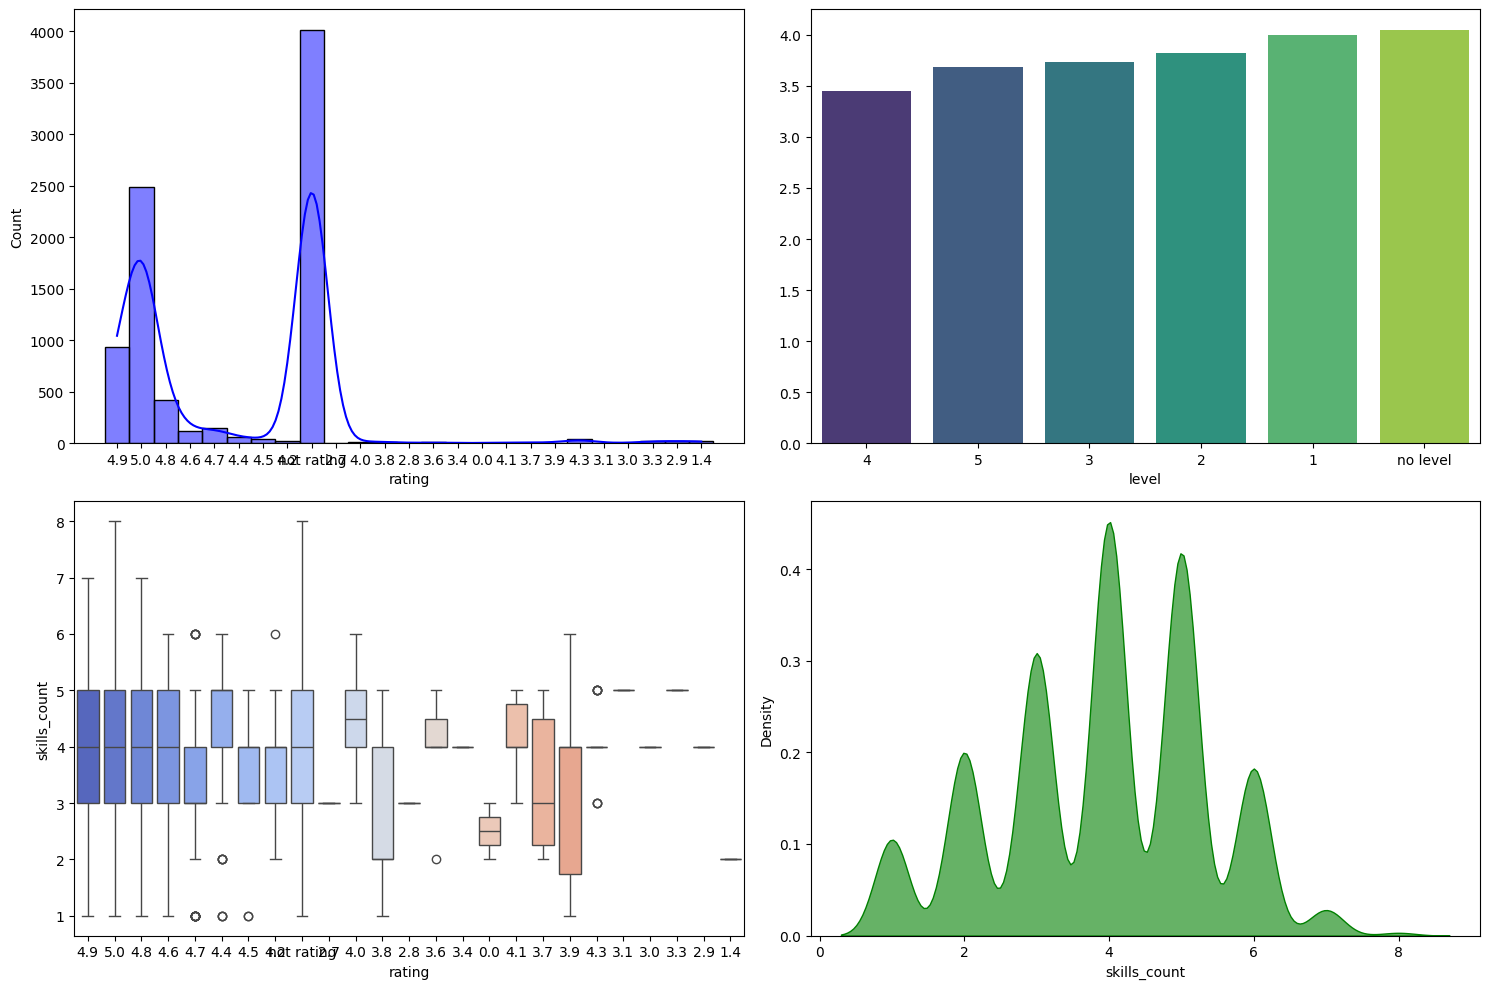

In [66]:
df["skills_count"] = pd.to_numeric(df["skills_count"], errors="coerce")
df = df.dropna(subset=["skills_count"])
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df["rating"], bins=20, kde=True, color="blue")
plt.subplot(2, 2, 2)
avg_skills_per_level = df.groupby("level")["skills_count"].mean().sort_values()
sns.barplot(x=avg_skills_per_level.index, y=avg_skills_per_level.values, palette="viridis")
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="rating", y="skills_count", palette="coolwarm")
plt.subplot(2, 2, 4)
sns.kdeplot(df["skills_count"], fill=True, color="green", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
df["skills_count"].describe()



count    8401.000000
mean        3.915010
std         1.433499
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: skills_count, dtype: float64

<Axes: xlabel='skills_count', ylabel='rating'>

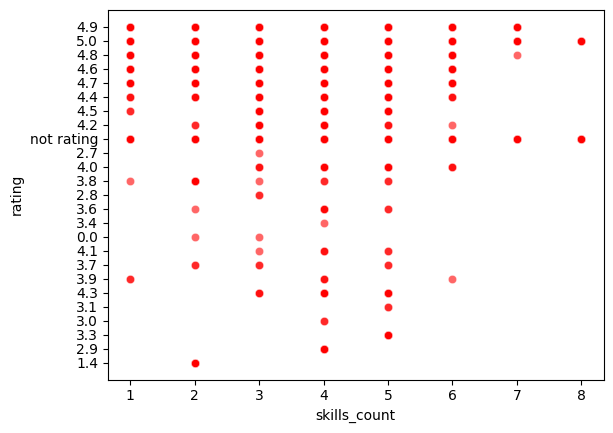

In [71]:
sns.scatterplot(data=df, x="skills_count", y="rating", alpha=0.6, color="red")

In [92]:
def categorize_rating(rating):
    try:
        rating = float(rating)  
        if rating < 3:
            return "low"
        elif 3 <= rating <= 4.5:
            return "mid"
        else:
            return "high"
    except ValueError:
        return "no rating"

df["rating_category"] = df["rating"].apply(categorize_rating)


In [93]:
df["rating_category"].value_counts()

rating_category
high         4106
no rating    4014
mid           237
low            44
Name: count, dtype: int64

In [82]:
value_counts = df.groupby(['skills_count', 'rating_category']).size().reset_index(name='counts')

value_counts

,skills_count,rating_category,counts
0,1,high,262
1,1,mid,8
2,1,no rating,249
3,2,high,509
4,2,low,20
5,2,mid,16
6,2,no rating,445
7,3,high,927
8,3,low,4
9,3,mid,35


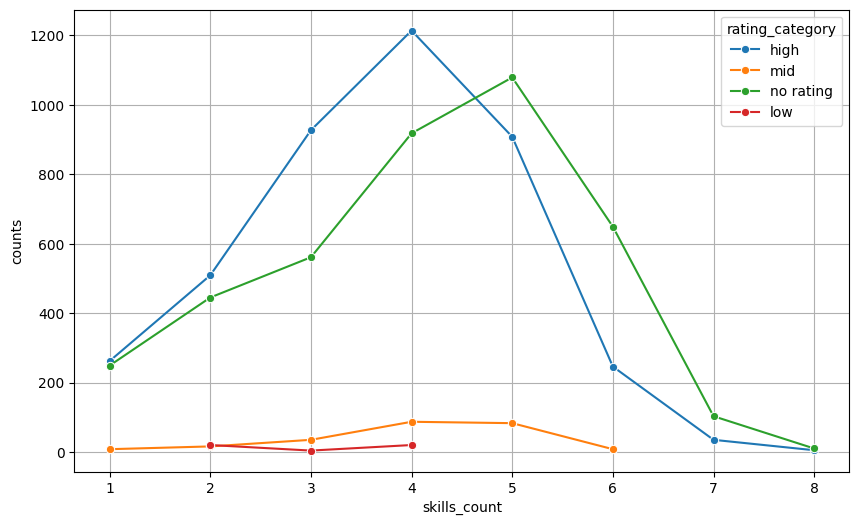

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=value_counts, x="skills_count", y="counts", hue="rating_category", marker="o")
plt.xlabel("skills_count")
plt.ylabel("counts")

plt.grid(True)


plt.show()

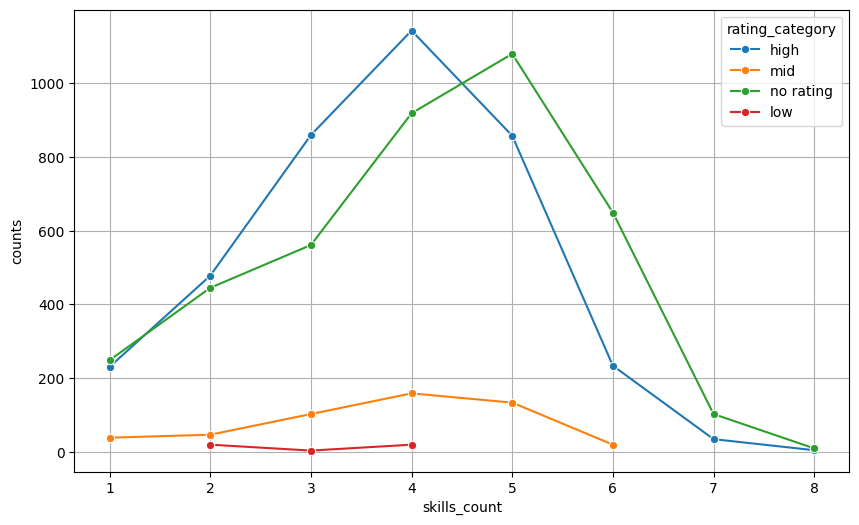

In [89]:
def categorize_rating(rating):
    try:
        rating = float(rating)  
        if rating < 3:
            return "low"
        elif 3 <= rating <= 4.7:
            return "mid"
        else:
            return "high"
    except ValueError:
        return "no rating"
value_counts = df.groupby(['skills_count', 'rating_category']).size().reset_index(name='counts')

value_counts
df["rating_category"] = df["rating"].apply(categorize_rating)
plt.figure(figsize=(10, 6))
sns.lineplot(data=value_counts, x="skills_count", y="counts", hue="rating_category", marker="o")
plt.xlabel("skills_count")
plt.ylabel("counts")

plt.grid(True)


plt.show()

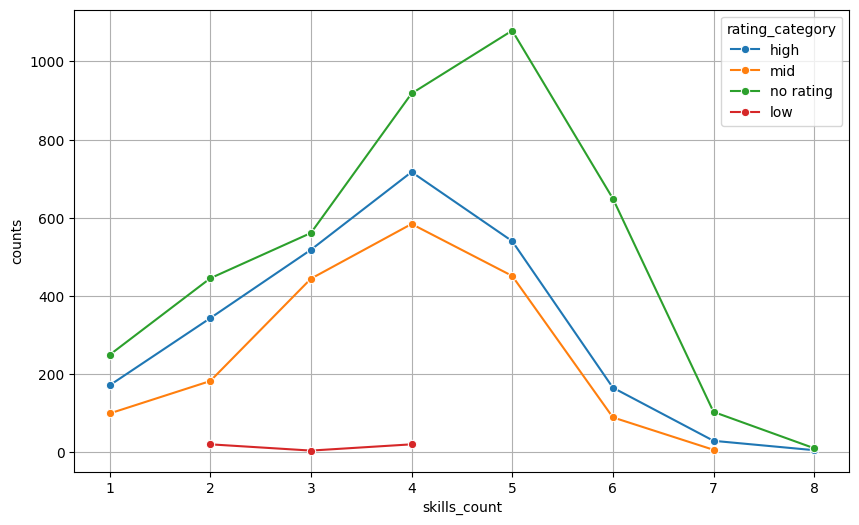

In [ ]:
def categorize_rating(rating):
    try:
        rating = float(rating)  
        if rating < 2:
            return "low"
        elif 2 <= rating <= 4.9:
            return "mid"
        else:
            return "high"
    except ValueError:
        return "no rating"
df["rating_category"] = df["rating"].apply(categorize_rating)
value_counts = df.groupby(['skills_count', 'rating_category']).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
sns.lineplot(data=value_counts, x="skills_count", y="counts", hue="rating_category", marker="o")
plt.xlabel("skills_count")
plt.ylabel("counts")

plt.grid(True)


plt.show()

In [154]:
df

,price,country,description,rating,reviews,Region,skills_list,skills_count,level,categories,skills_list_standardization,description_Length,Extracted_Skills_from_description,Extracted_Skills_from_description_list,Extracted_Skills_from_description_number,rating_category,reviews_category
0,18,India,OweBest is a dynamic and rapidly expanding IT ...,4.9,490,Asia,"['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...",3,5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'My', 'Software', 'Archi...",994,"business, expertise, Web, Design, Development,...","[' Web', ' Development', ' quality', ' experti...",221,high,High
1,15,India,"7000 ⭐⭐⭐⭐⭐+ Reviews, 2000+ satisfied clients G...",4.9,7018,Asia,"['SEOLink', 'BuildingInternet', 'MarketingAdve...",4,5,['Marketing'],"['Link', 'Building', 'Internet', 'Marketing', ...",2936,"clients, Business, Expertise, Google, Marketin...","[' Data', ' Experience', ' Years', ' social', ...",420,high,Very High
2,45,Pakistan,TAFSOL TECHNOLOGIES Group!! Aiming to deliver ...,5.0,195,Asia,"['PHPWebsite', 'DesignHTMLSoftware', 'Architec...",4,5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'Software', 'Architectur...",2663,"Projects, Digital, SERVICES, Mobile, App, Deve...","[' Experience', ' experience', ' Years', ' web...",464,high,High
3,30,Bangladesh,eTranslators offers over a DECADE of experienc...,4.9,3633,Asia,"['TranslationEnglish (US)', 'TranslatorEnglish...",4,5,['Translation'],"['Translation', 'English', 'Translator', 'Engl...",1296,"experience, professional, DIGITAL, CONTENT, DE...","[' quality', ' MANAGEMENT', ' services', ' Hig...",158,high,Very High
4,45,India,The Grace Of Almighty God ____________________...,5.0,558,Asia,"['Internet', 'MarketingFacebook', 'MarketingSo...",5,3,['Other'],"['Internet', 'Marketing', 'Facebook', 'Marketi...",1508,"Marketing, Google, services, Services, Google,...","[' Web', ' business', ' services', ' Business'...",186,high,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,35,Sri Lanka,If you have been scouring the internet looking...,4.9,1703,Asia,"['PHPMySQLSoftware', 'ArchitectureJavaScriptAm...",4,3,"['Programming', 'Web Development']","['My', 'Software', 'Architecture', 'Java', 'Sc...",925,"professional, work, experience, Web, App, year...","[' Web', ' let', 'professional', ' using', ' w...",90,high,Very High
8397,25,India,Emdyarts is a highly acclaimed agency on Freel...,4.9,2755,Asia,"['Graphic', 'DesignPhotoshopLogo', 'DesignPhot...",5,5,['Graphic Design'],"['Graphic', 'Design', 'Photoshop', 'Logo', 'De...",1087,"Graphic, services, Logo, designs, clients, Log...","[' Logo', ' clients', 'Graphic', ' services', ...",97,high,Very High
8398,25,India,"My name is Bhawan Baweja, I am a full stack de...",4.9,475,Asia,"['PHPHTMLWebsite', 'DesignWordPressGraphic', '...",3,5,"['Graphic Design', 'Web Development']","['Website', 'Design', 'Word', 'Press', 'Graphi...",739,"developer, years, experience, skills, software...","['developer', ' app', ' skills', ' work', ' so...",121,high,High
8399,15,India,I'm a Senior Web Developer with over 8+ years ...,5.0,388,Asia,"['PHPMagentoHTMLeCommerceWebsite', 'Design']",2,4,"['Graphic Design', 'Web Development']","['Magento', 'Le', 'Commerce', 'Website', 'Desi...",945,"Web, Developer, years, experience, Skills, Exp...","[' development', ' quality', ' Custom', ' Skil...",100,high,High


In [143]:
def categorize_reviews(reviews):
    try:
        reviews = float(reviews)  
        if reviews < 3:
            return "Very Low"
        elif 4 <= reviews <= 19:
            return "low"
        elif 20 <= reviews <= 85:
            return "Medium"
        elif 86 <= reviews <= 499:
            return "High"
        else:
            return "Very High"
    except ValueError:
        return "no review"
df["reviews_category"] = df["reviews"].apply(categorize_reviews)

In [144]:
df["reviews_category"].value_counts()

reviews_category
no review    4014
low          1234
Medium       1119
High          839
Very Low      711
Very High     484
Name: count, dtype: int64

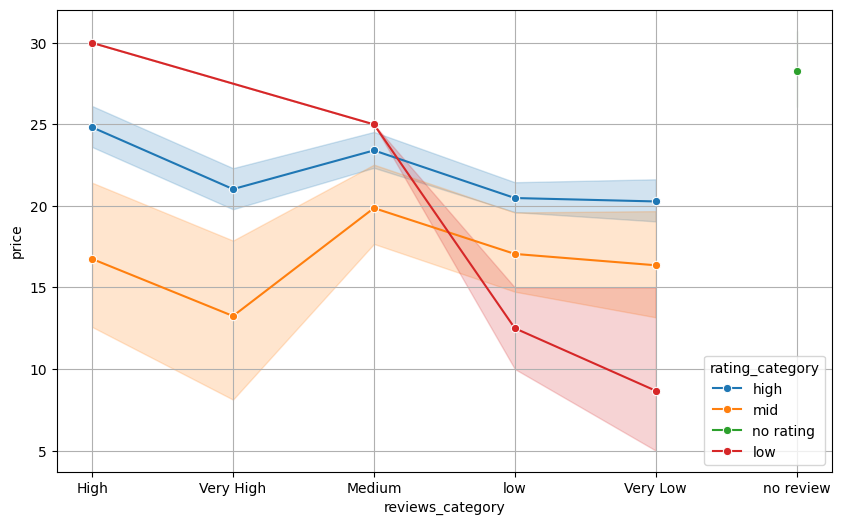

In [155]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="reviews_category", y="price", hue="rating_category", marker="o")
plt.xlabel("reviews_category")
plt.ylabel("price")

plt.grid(True)


plt.show()

<Axes: xlabel='price', ylabel='Count'>

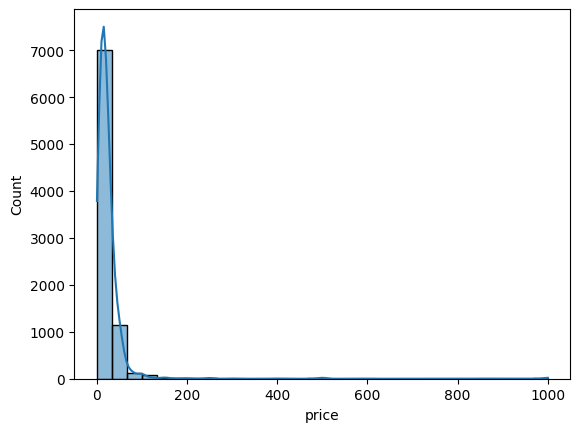

In [163]:
sns.histplot(df['price'], bins=30, kde=True)

<Axes: xlabel='price', ylabel='rating'>

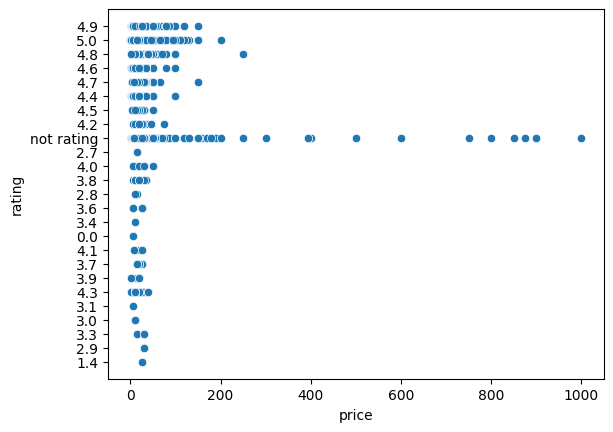

In [164]:
sns.scatterplot(x=df['price'], y=df['rating'])

<Axes: xlabel='country'>

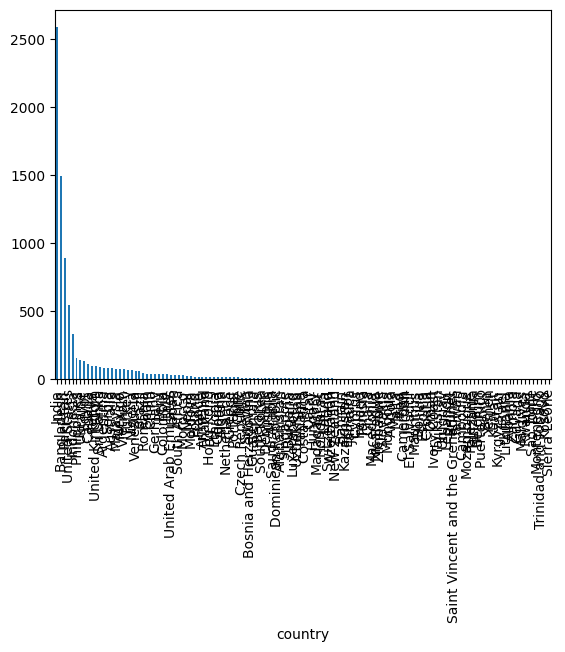

In [165]:
df['country'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

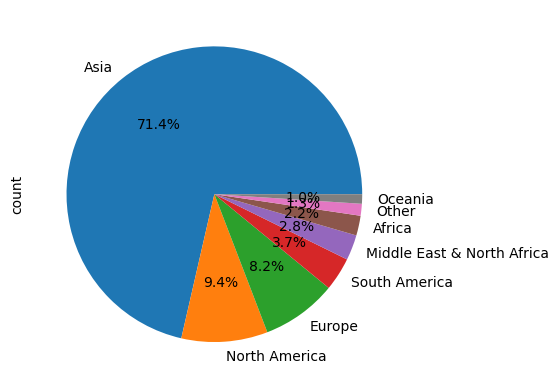

In [166]:
df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='rating'>

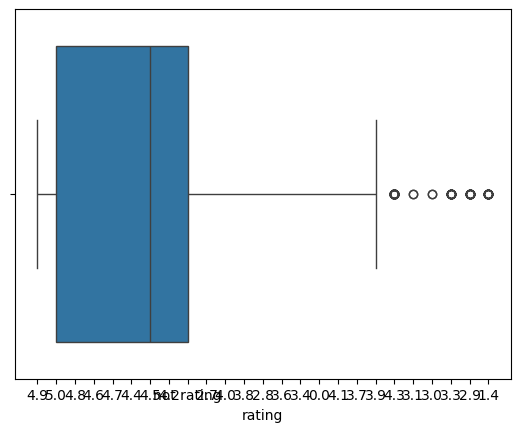

In [ ]:
sns.boxplot(x=df['rating'])

<Axes: xlabel='rating_category'>

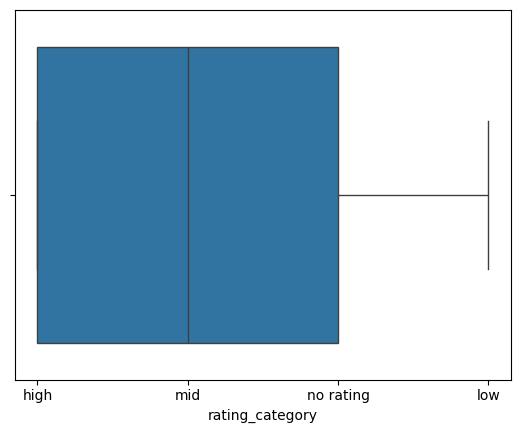

In [7]:
sns.boxplot(x=df["rating_category"])

<Axes: xlabel='reviews', ylabel='rating'>

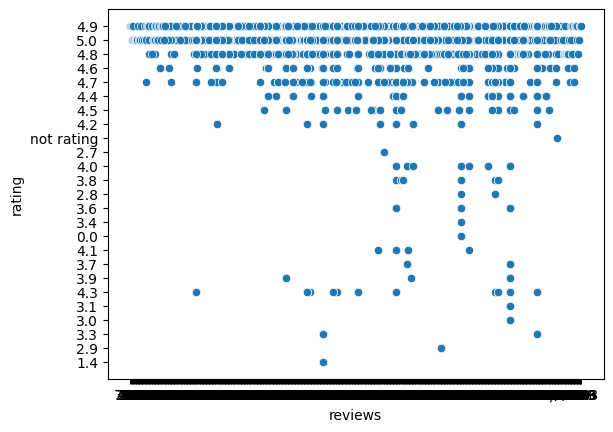

In [168]:
sns.scatterplot(x=df['reviews'], y=df['rating'])

<Axes: xlabel='rating_category', ylabel='count'>

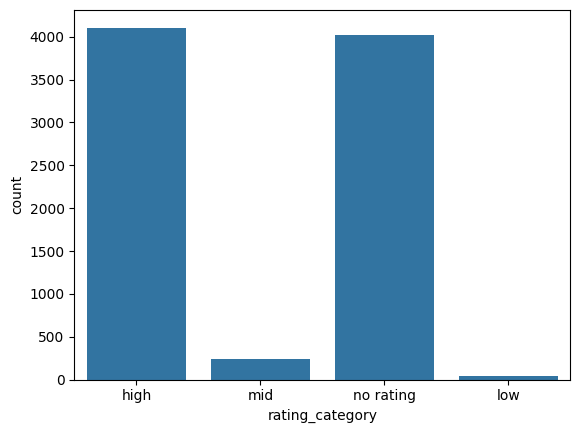

In [169]:
sns.countplot(x=df['rating_category'])

<Axes: xlabel='skills_count', ylabel='price'>

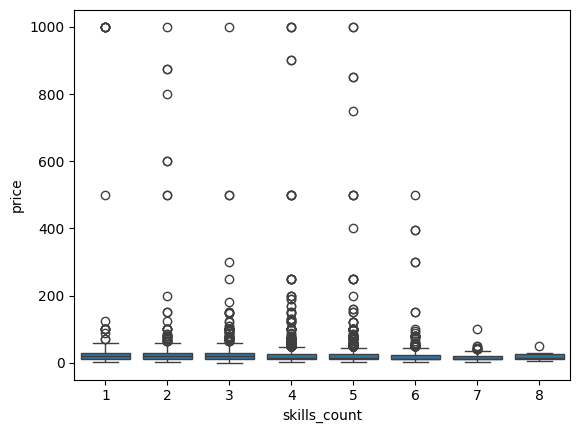

In [173]:
sns.boxplot(x=df['skills_count'], y=df['price'])


In [161]:
df.to_csv("last_v_of_data.csv", index=False)

In [3]:
data.columns

Index(['price', 'country', 'description', 'rating', 'reviews', 'Region',
       'skills_list', 'skills_count', 'level', 'categories',
       'skills_list_standardization', 'description_Length',
       'Extracted_Skills_from_description',
       'Extracted_Skills_from_description_list',
       'Extracted_Skills_from_description_number', 'rating_category',
       'reviews_category'],
      dtype='object')

In [19]:
data['price'].value_counts()

price
10     740
20     669
15     593
25     432
30     389
      ... 
46       1
44       1
90       1
130      1
85       1
Name: count, Length: 66, dtype: int64

In [15]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

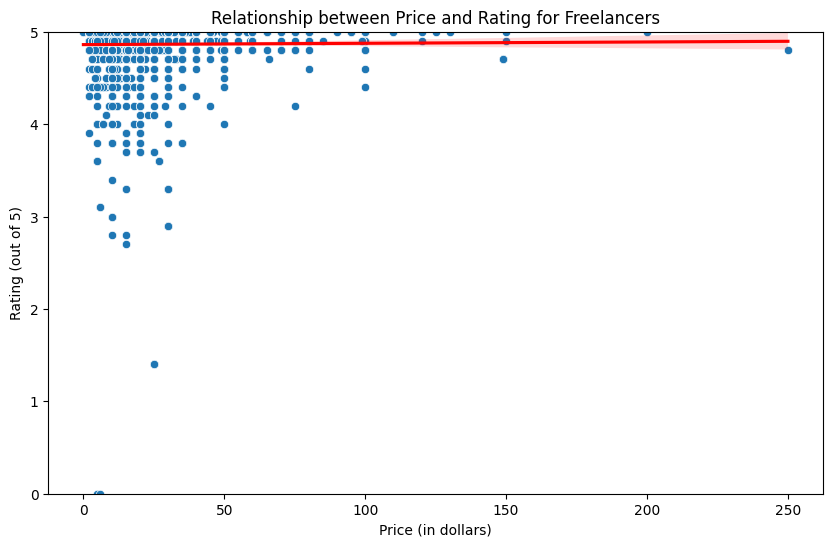

In [ ]:
data = data.dropna(subset=['price', 'rating'])

plt.figure(figsize=(10, 6))

sns.scatterplot(x='price', y='rating', data=data)

sns.regplot(x='price', y='rating', data=data, scatter=False, color='red')

plt.ylim(0, 5)


plt.xlabel('Price (in dollars)')
plt.ylabel('Rating (out of 5)')
plt.title('Relationship between Price and Rating for Freelancers')


plt.show()

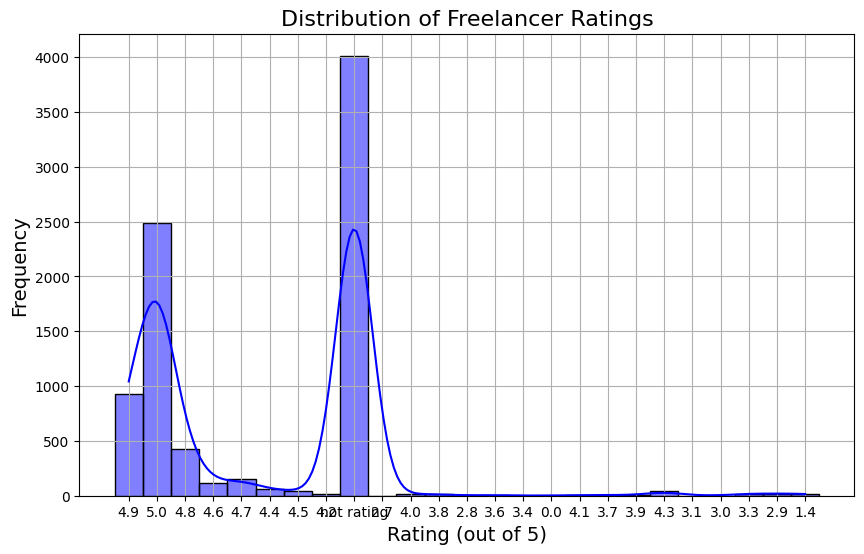

count           8401
unique            25
top       not rating
freq            4014
Name: rating, dtype: object


In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Freelancer Ratings', fontsize=16)
plt.xlabel('Rating (out of 5)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.grid(True)


plt.show()


summary_stats = data['rating'].describe()
print(summary_stats)

In [27]:
data_with_rating = data[data['rating'] != 'not rating']
data_without_rating = data[data['rating'] == 'not rating']

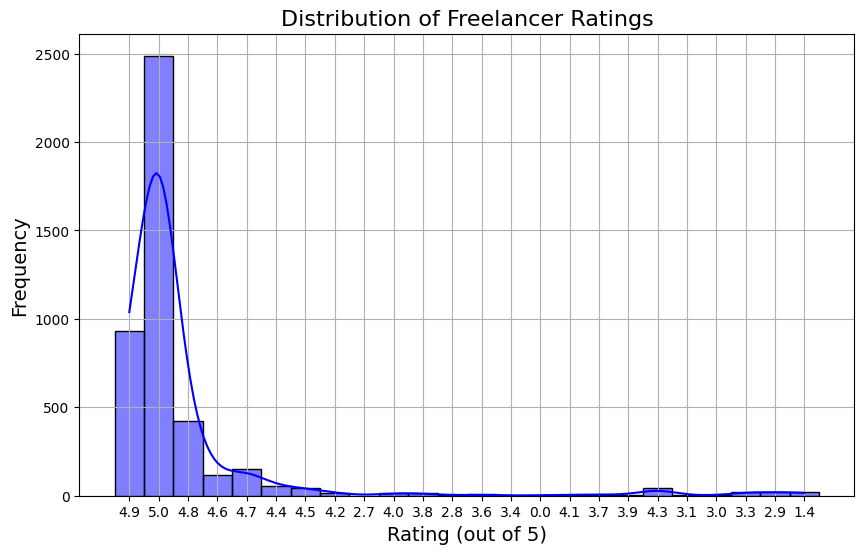

count     4387
unique      24
top        5.0
freq      2488
Name: rating, dtype: object


In [28]:
df = data_with_rating
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Freelancer Ratings', fontsize=16)
plt.xlabel('Rating (out of 5)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.grid(True)


plt.show()


summary_stats = df['rating'].describe()
print(summary_stats)

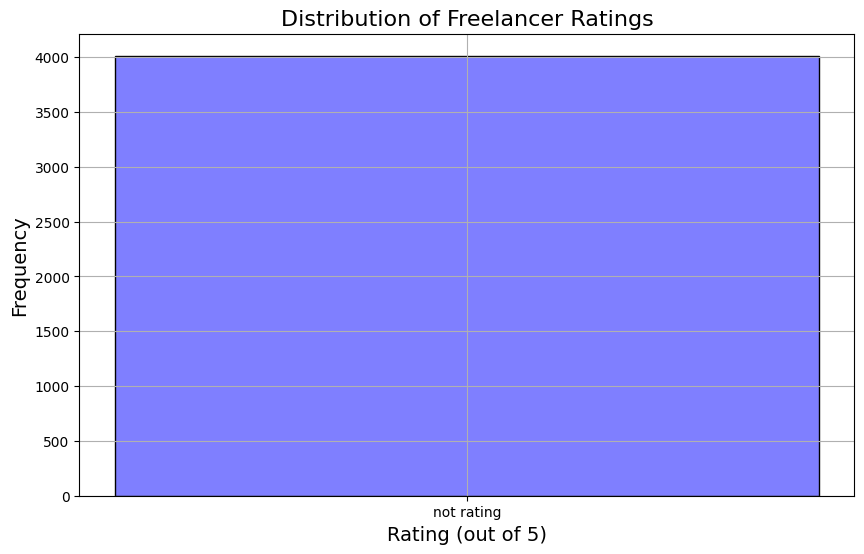

count           4014
unique             1
top       not rating
freq            4014
Name: rating, dtype: object


In [29]:
df = data_without_rating
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Freelancer Ratings', fontsize=16)
plt.xlabel('Rating (out of 5)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.grid(True)


plt.show()


summary_stats = df['rating'].describe()
print(summary_stats)

In [36]:
data_cleaned = data_with_rating.dropna(subset=['Region', 'price'])


average_price_by_region = data_cleaned.groupby('Region')['price'].mean().sort_values(ascending=False)

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\2957226284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_region.index, y=average_price_by_region.values, palette='Blues_d')


Text(0, 0.5, 'Average Price ($)')

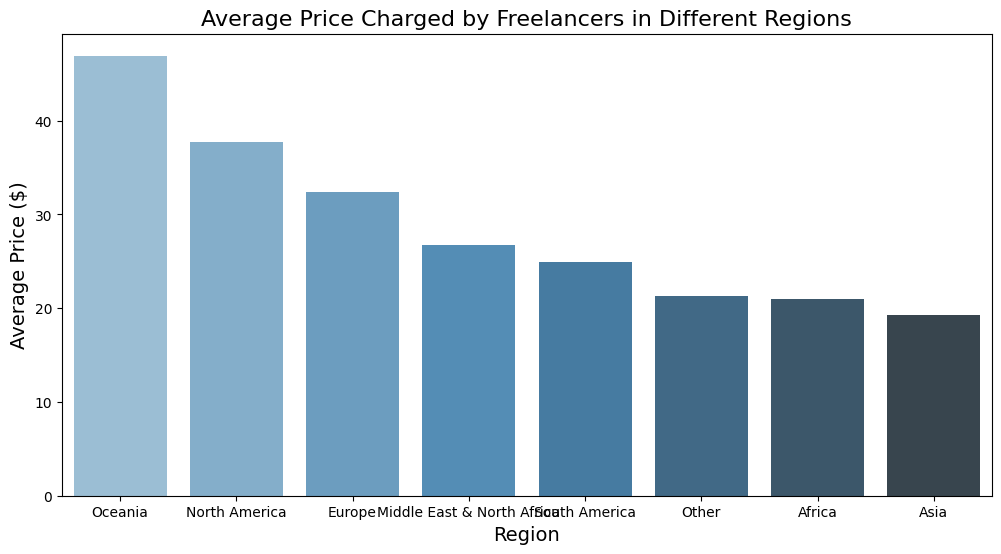

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_region.index, y=average_price_by_region.values, palette='Blues_d')


plt.title('Average Price Charged by Freelancers in Different Regions', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

In [40]:
average_price_by_region =data_with_rating.groupby("country")['price'].mean().sort_values(ascending=False)

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\1445581726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_region.values, y=average_price_by_region.index, palette='Blues_d')


Text(0.5, 0, 'Average Price ($)')

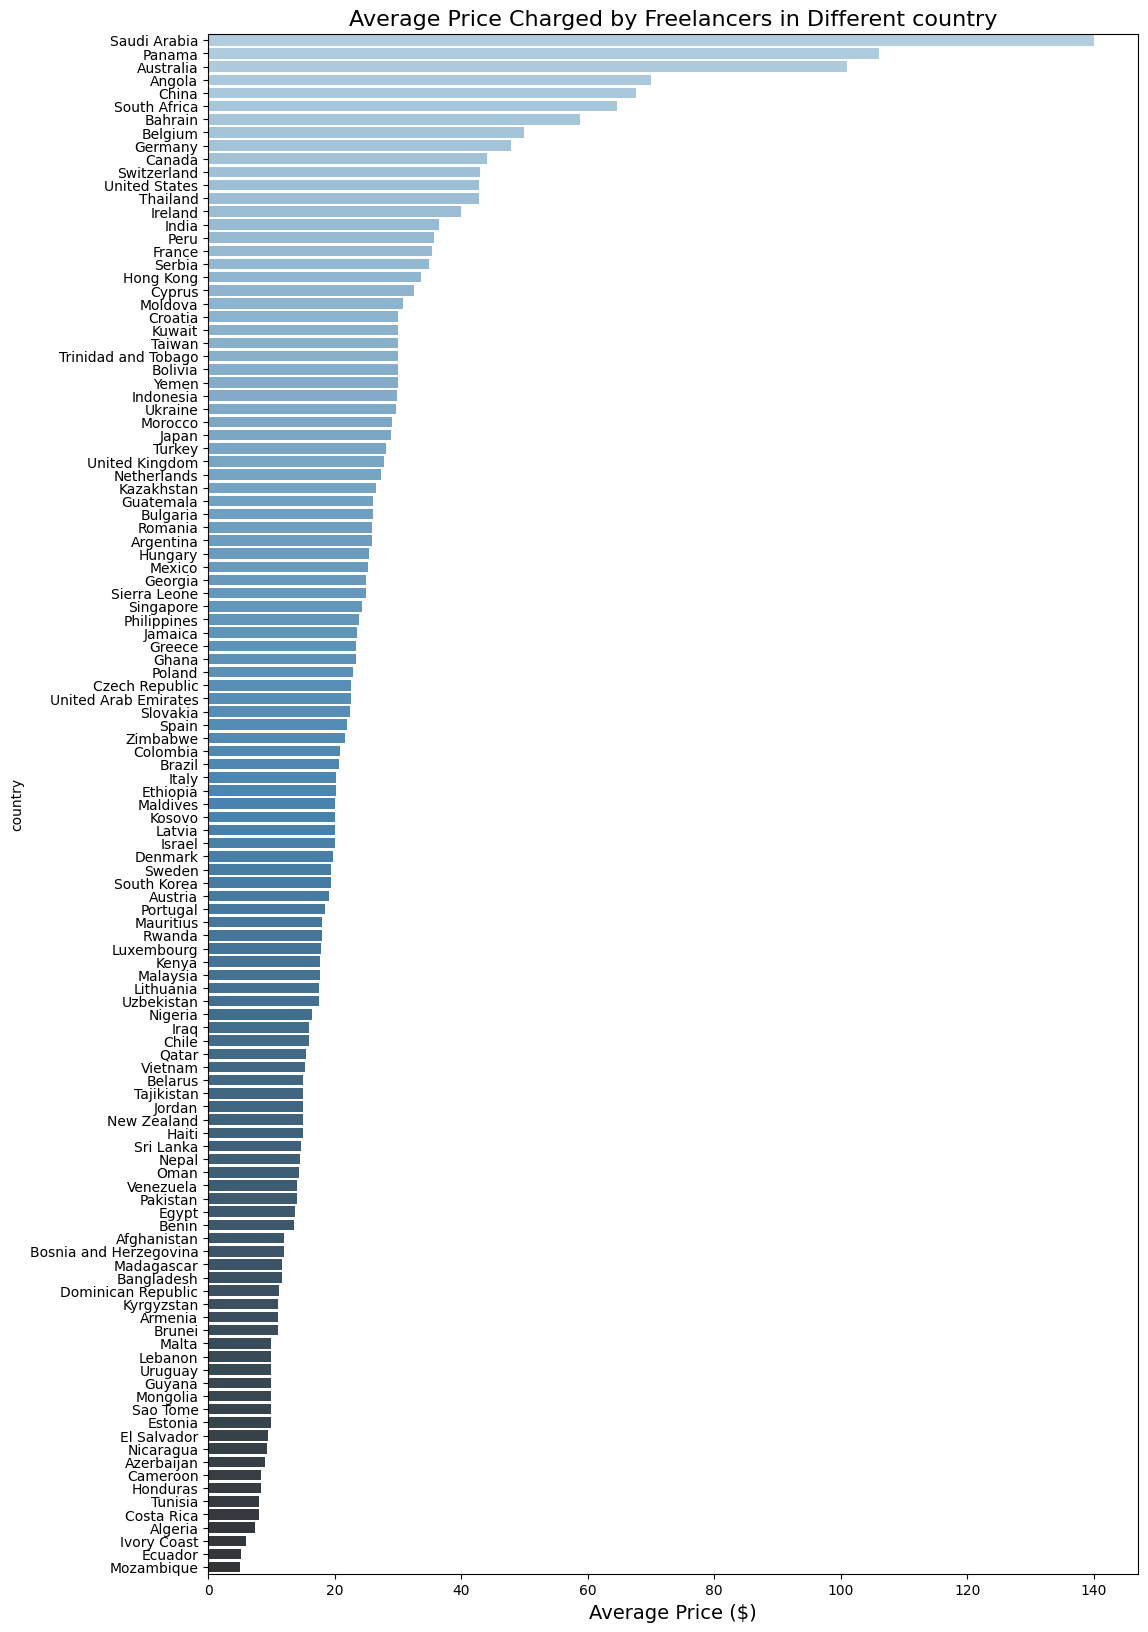

In [50]:
plt.figure(figsize=(12, 20))
sns.barplot(x=average_price_by_region.values, y=average_price_by_region.index, palette='Blues_d')


plt.title('Average Price Charged by Freelancers in Different country', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=14)

In [47]:
average_price_by_region =data_without_rating.groupby("country")['price'].mean().sort_values(ascending=False)

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\2548030532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_region.values, y=average_price_by_region.index, palette='Blues_d')


Text(0.5, 0, 'Average Price ($)')

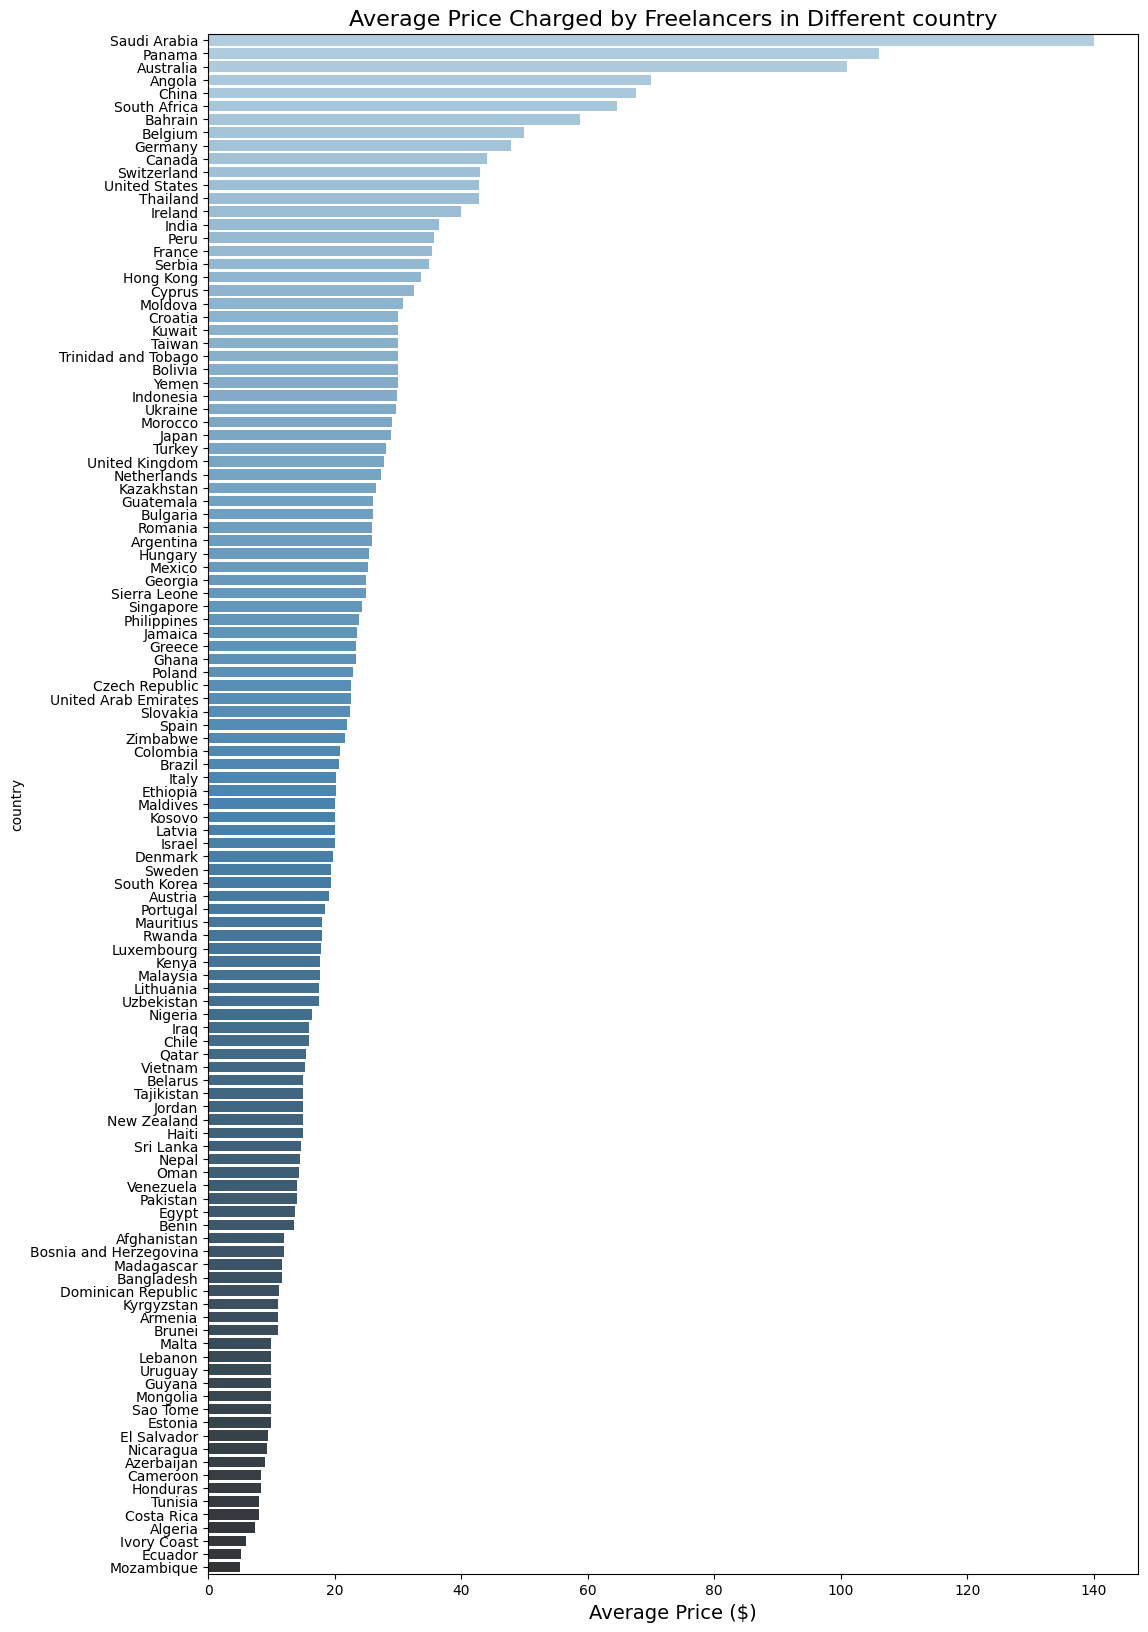

In [49]:
plt.figure(figsize=(12, 20))
sns.barplot(x=average_price_by_region.values, y=average_price_by_region.index, palette='Blues_d')


plt.title('Average Price Charged by Freelancers in Different country', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=14)


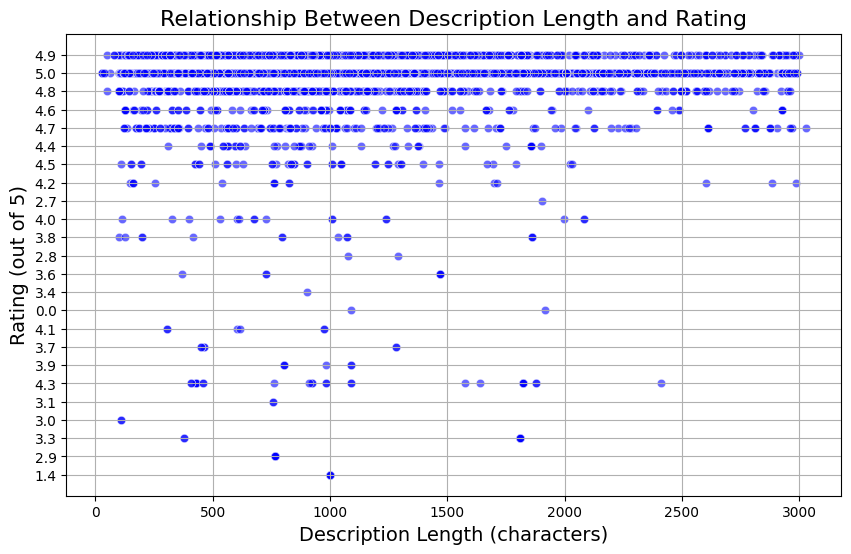

In [ ]:
data_cleaned = data_with_rating.dropna(subset=['description_Length', 'rating'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='description_Length', y='rating', data=data_cleaned, color='blue', alpha=0.6)
plt.title('Relationship Between Description Length and Rating', fontsize=16)
plt.xlabel('Description Length (characters)', fontsize=14)
plt.ylabel('Rating (out of 5)', fontsize=14)

plt.grid(True)

plt.show()


Cleaned 'description_Length':
count    4387.000000
mean     1064.253704
std       685.638867
min        26.000000
25%       559.000000
50%       925.000000
75%      1417.000000
max      3029.000000
Name: description_Length, dtype: float64
Cleaned 'rating':
count    4387.000000
mean        4.863643
std         0.365039
min         0.000000
25%         4.900000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


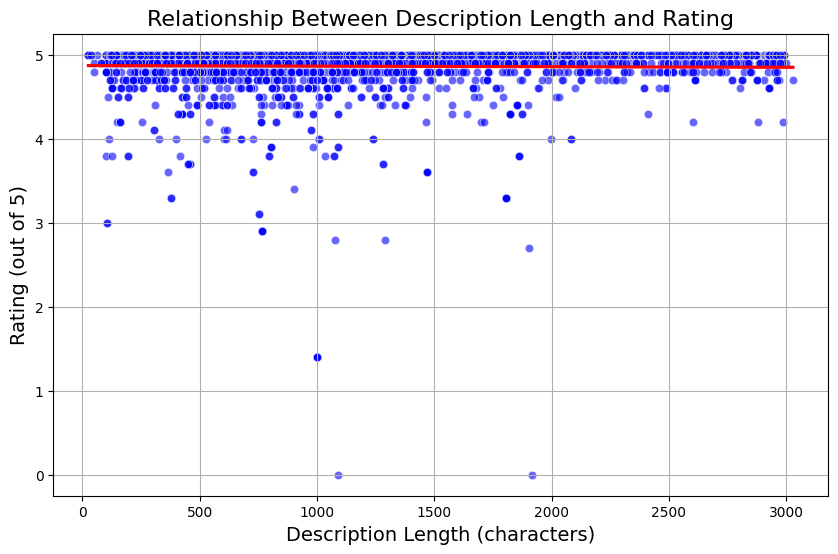

Correlation between description length and rating: -0.01


In [ ]:
data_cleaned['description_Length'] = pd.to_numeric(data_cleaned['description_Length'], errors='coerce')
data_cleaned['rating'] = pd.to_numeric(data_cleaned['rating'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['description_Length', 'rating'])
print("Cleaned 'description_Length':")
print(data_cleaned['description_Length'].describe())

print("Cleaned 'rating':")
print(data_cleaned['rating'].describe())
plt.figure(figsize=(10, 6))
sns.scatterplot(x='description_Length', y='rating', data=data_cleaned, color='blue', alpha=0.6)
sns.regplot(x='description_Length', y='rating', data=data_cleaned, scatter=False, color='red')
plt.title('Relationship Between Description Length and Rating', fontsize=16)
plt.xlabel('Description Length (characters)', fontsize=14)
plt.ylabel('Rating (out of 5)', fontsize=14)
plt.grid(True)
plt.show()
correlation = data_cleaned['description_Length'].corr(data_cleaned['rating'])
print(f"Correlation between description length and rating: {correlation:.2f}")

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\675183241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='level', y='rating', data=data_cleaned, palette='Blues_d', inner='quartile')


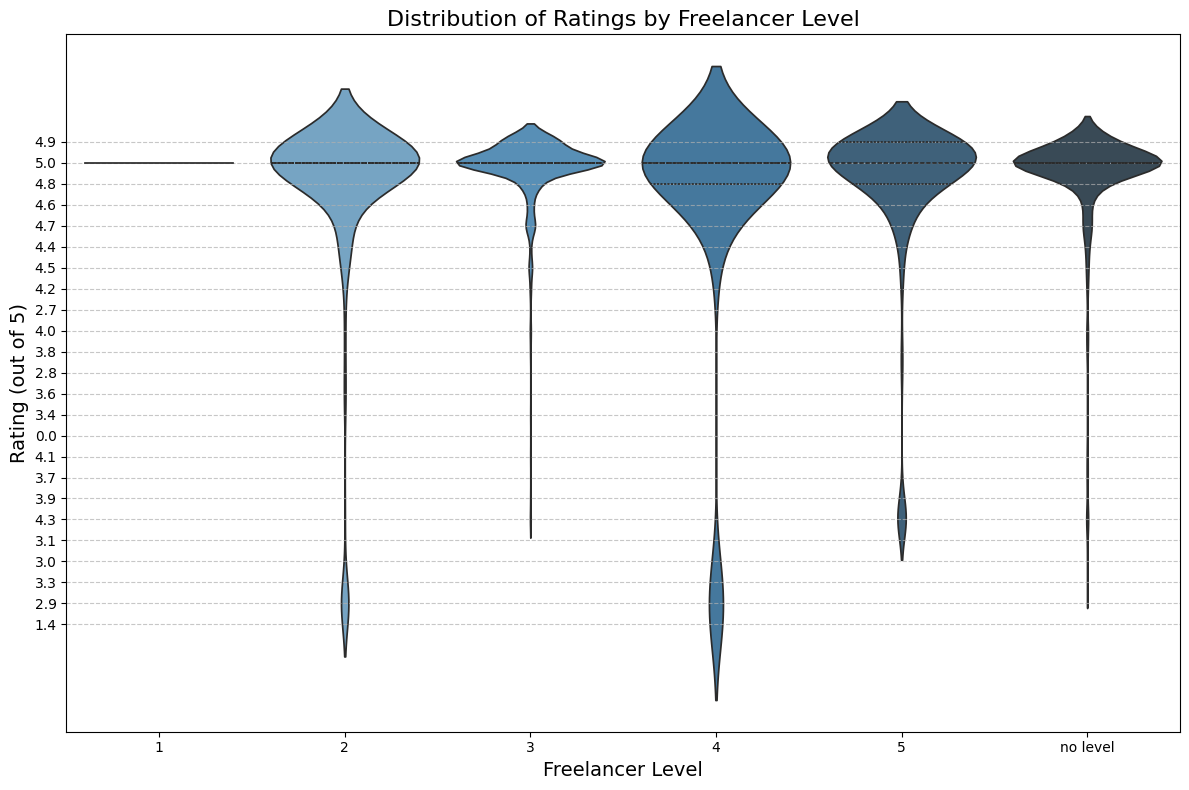

         count unique  top  freq
level                           
1            3      1  5.0     3
2          512     13  5.0   296
3         1073     15  5.0   653
4          419      9  5.0   203
5          673     12  5.0   237
no level  1707     19  5.0  1096


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\675183241.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data_cleaned.groupby('level')['rating'].describe()


In [61]:
data_cleaned = data_with_rating.dropna(subset=['level', 'rating'])
data_cleaned['level'] = data_cleaned['level'].astype('category')
plt.figure(figsize=(12, 8))
sns.violinplot(x='level', y='rating', data=data_cleaned, palette='Blues_d', inner='quartile')
plt.title('Distribution of Ratings by Freelancer Level', fontsize=16)
plt.xlabel('Freelancer Level', fontsize=14)
plt.ylabel('Rating (out of 5)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

summary_stats = data_cleaned.groupby('level')['rating'].describe()
print(summary_stats)

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\4256323757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='level', y='rating', data=data_cleaned, palette='Blues_d', inner='quartile')


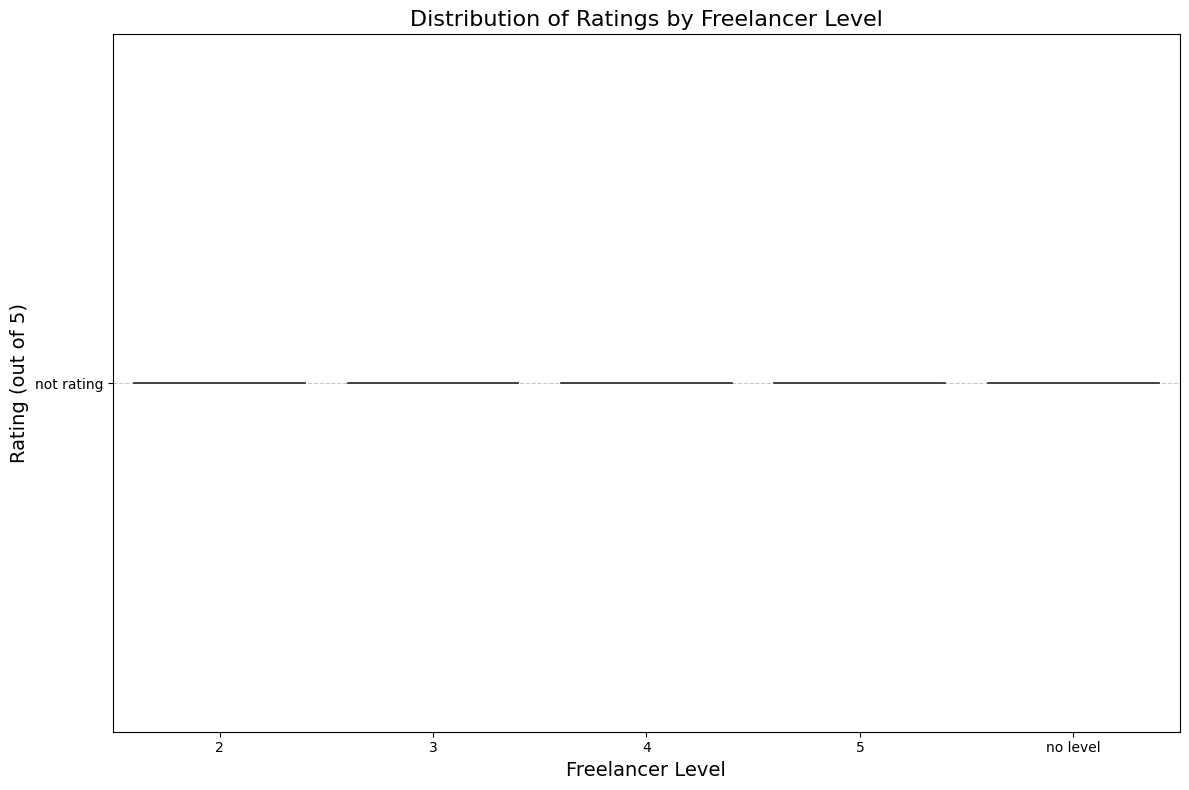

         count unique         top  freq
level                                  
2           70      1  not rating    70
3          497      1  not rating   497
4           25      1  not rating    25
5           26      1  not rating    26
no level  3396      1  not rating  3396


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\4256323757.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data_cleaned.groupby('level')['rating'].describe()


In [62]:
data_cleaned = data_without_rating.dropna(subset=['level', 'rating'])
data_cleaned['level'] = data_cleaned['level'].astype('category')
plt.figure(figsize=(12, 8))
sns.violinplot(x='level', y='rating', data=data_cleaned, palette='Blues_d', inner='quartile')
plt.title('Distribution of Ratings by Freelancer Level', fontsize=16)
plt.xlabel('Freelancer Level', fontsize=14)
plt.ylabel('Rating (out of 5)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

summary_stats = data_cleaned.groupby('level')['rating'].describe()
print(summary_stats)

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\2389805345.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_rating = data_cleaned.groupby('rating_category')['price'].mean().sort_index()


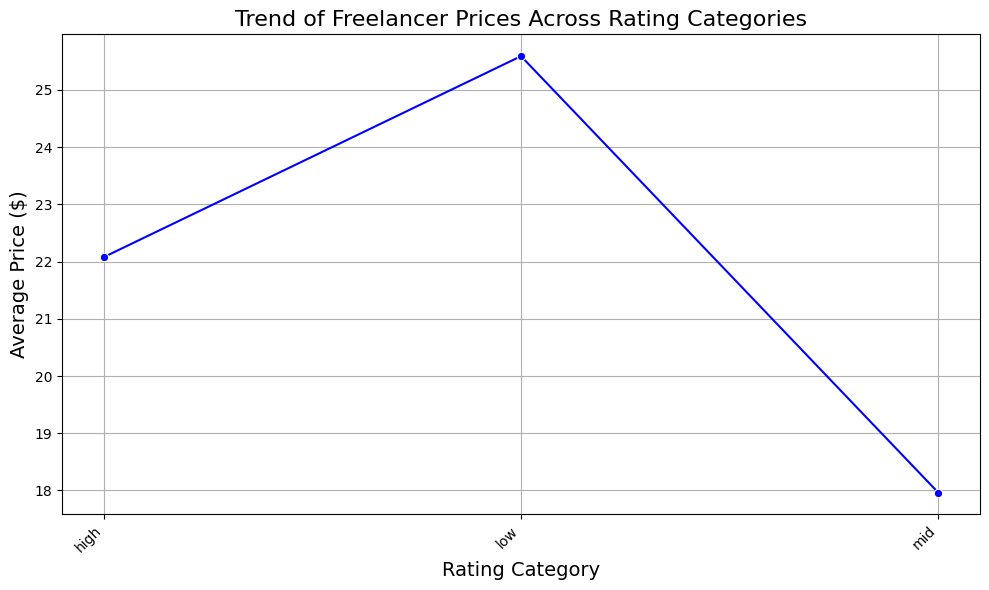

Average Price by Rating Category:
rating_category
high    22.077935
low     25.590909
mid     17.962025
Name: price, dtype: float64


In [64]:
data_cleaned = data_with_rating.dropna(subset=['rating_category', 'price'])

data_cleaned['rating_category'] = data_cleaned['rating_category'].astype('category')

average_price_by_rating = data_cleaned.groupby('rating_category')['price'].mean().sort_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_rating.index, y=average_price_by_rating.values, marker='o', color='blue')

plt.title('Trend of Freelancer Prices Across Rating Categories', fontsize=16)
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Average Price by Rating Category:")
print(average_price_by_rating)

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\1760898083.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_rating = data_cleaned.groupby('rating_category')['price'].mean().sort_index()


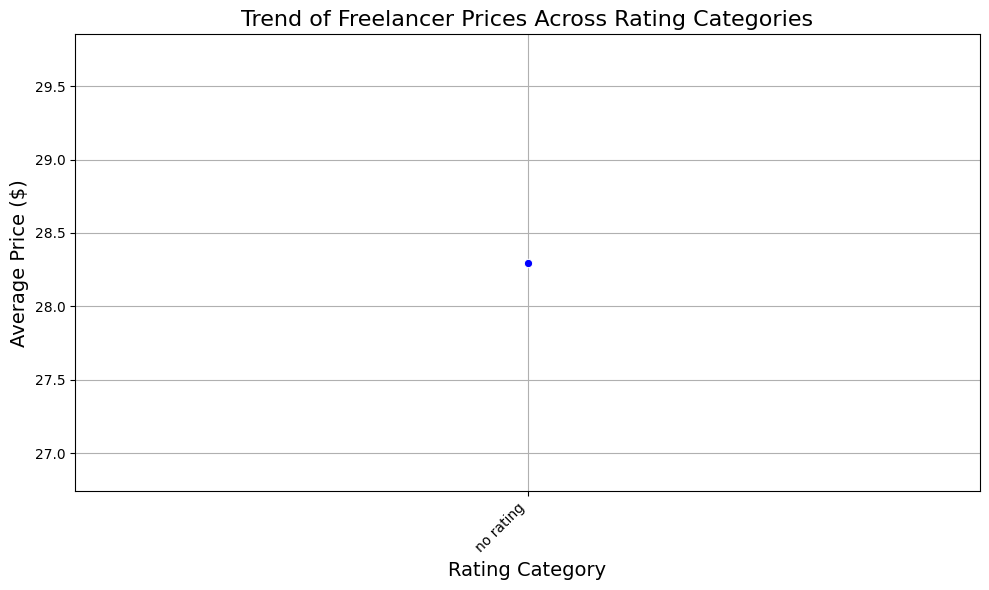

Average Price by Rating Category:
rating_category
no rating    28.296462
Name: price, dtype: float64


In [65]:
data_cleaned = data_without_rating.dropna(subset=['rating_category', 'price'])

data_cleaned['rating_category'] = data_cleaned['rating_category'].astype('category')

average_price_by_rating = data_cleaned.groupby('rating_category')['price'].mean().sort_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_rating.index, y=average_price_by_rating.values, marker='o', color='blue')

plt.title('Trend of Freelancer Prices Across Rating Categories', fontsize=16)
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Average Price by Rating Category:")
print(average_price_by_rating)

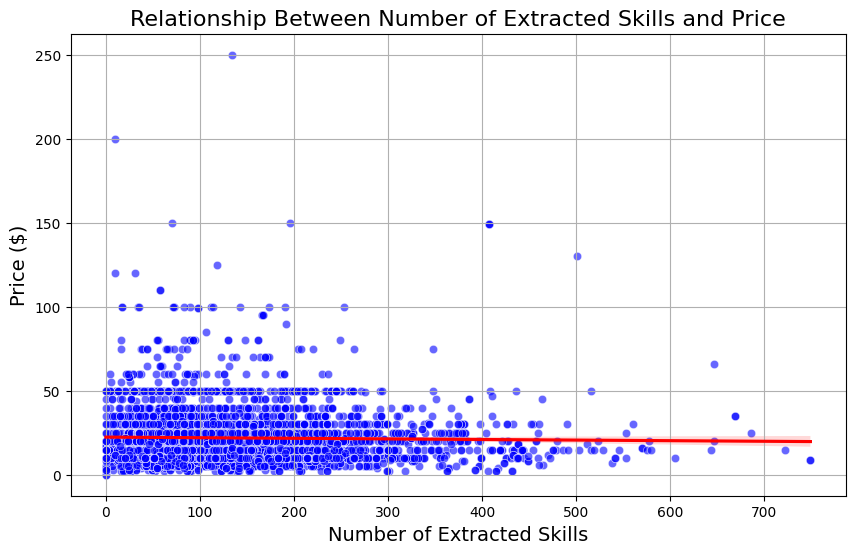

Correlation between number of extracted skills and price: -0.02


In [66]:
data_cleaned = data_with_rating.dropna(subset=['Extracted_Skills_from_description_number', 'price'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Extracted_Skills_from_description_number', y='price', data=data_cleaned, color='blue', alpha=0.6)

# Add a trend line
sns.regplot(x='Extracted_Skills_from_description_number', y='price', data=data_cleaned, scatter=False, color='red')

# Add titles and labels
plt.title('Relationship Between Number of Extracted Skills and Price', fontsize=16)
plt.xlabel('Number of Extracted Skills', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# Optional: Calculate correlation coefficient
correlation = data_cleaned['Extracted_Skills_from_description_number'].corr(data_cleaned['price'])
print(f"Correlation between number of extracted skills and price: {correlation:.2f}")

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\2458471278.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_cleaned['price'], shade=True, color='green')


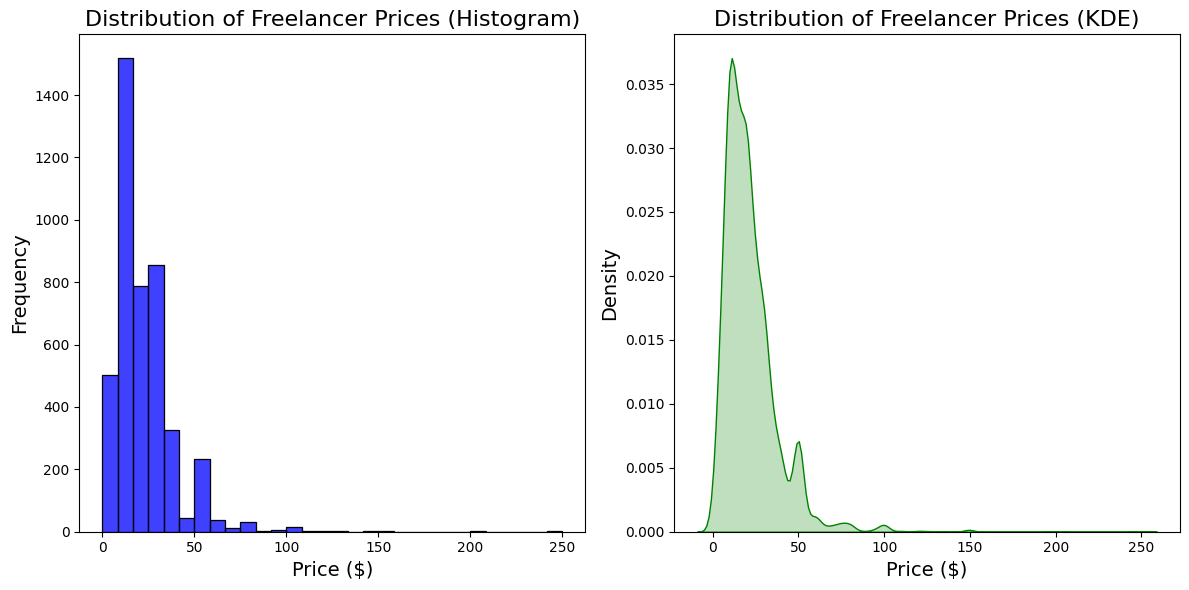

count    4387.000000
mean       21.890814
std        16.259430
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max       250.000000
Name: price, dtype: float64


In [68]:
data_cleaned = data_with_rating.dropna(subset=['price'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
sns.histplot(data_cleaned['price'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Freelancer Prices (Histogram)', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.subplot(1, 2, 2)  #
sns.kdeplot(data_cleaned['price'], shade=True, color='green')
plt.title('Distribution of Freelancer Prices (KDE)', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.tight_layout()


plt.show()


summary_stats = data_cleaned['price'].describe()
print(summary_stats)

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\827705010.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_cleaned['price'], shade=True, color='green')


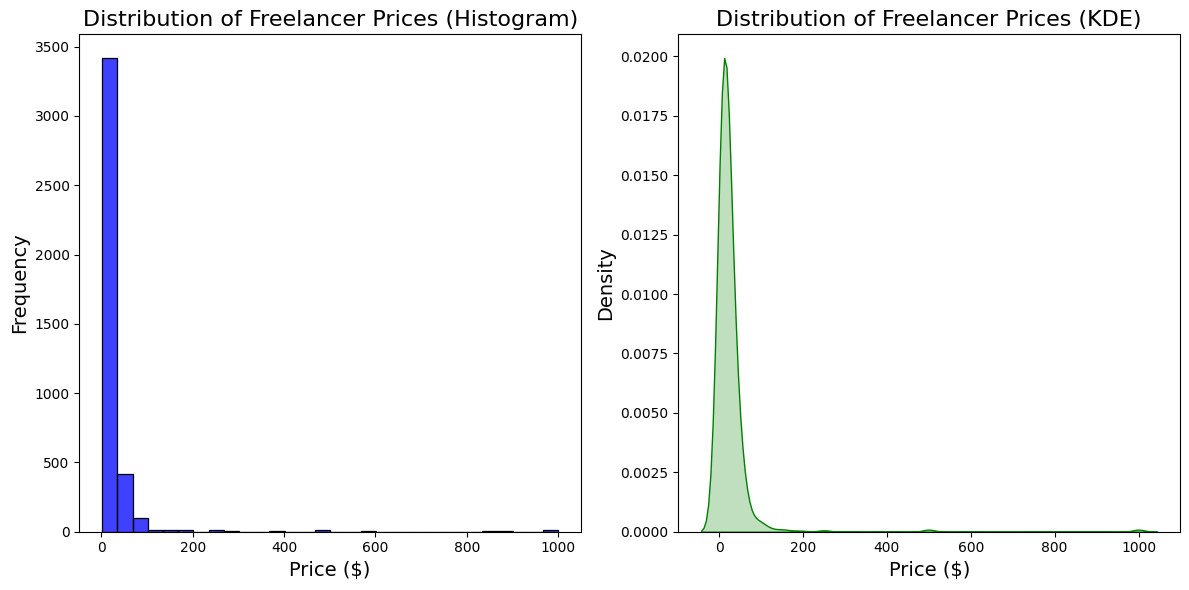

count    4014.000000
mean       28.296462
std        77.786492
min         2.000000
25%        10.000000
50%        15.000000
75%        26.000000
max      1000.000000
Name: price, dtype: float64


In [69]:
data_cleaned = data_without_rating.dropna(subset=['price'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
sns.histplot(data_cleaned['price'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Freelancer Prices (Histogram)', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.subplot(1, 2, 2)  #
sns.kdeplot(data_cleaned['price'], shade=True, color='green')
plt.title('Distribution of Freelancer Prices (KDE)', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.tight_layout()


plt.show()


summary_stats = data_cleaned['price'].describe()
print(summary_stats)

In [75]:
data_cleaned = data_with_rating.dropna(subset=['categories', 'rating'])
data_cleaned['rating'] = pd.to_numeric(data_cleaned['rating'], errors='coerce')
# Ensure 'categories' is categorical (if not already)
data_cleaned['categories'] = data_cleaned['categories'].astype('category')

average_rating_by_category = data_cleaned.groupby('categories')['rating'].mean().sort_values(ascending=False)


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\2361841612.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_by_category = data_cleaned.groupby('categories')['rating'].mean().sort_values(ascending=False)


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\1946212293.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_by_category = data_exploded.groupby('categories')['rating'].mean().sort_values(ascending=False)
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\1946212293.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_category.values, y=average_rating_by_category.index, palette='Blues_d')


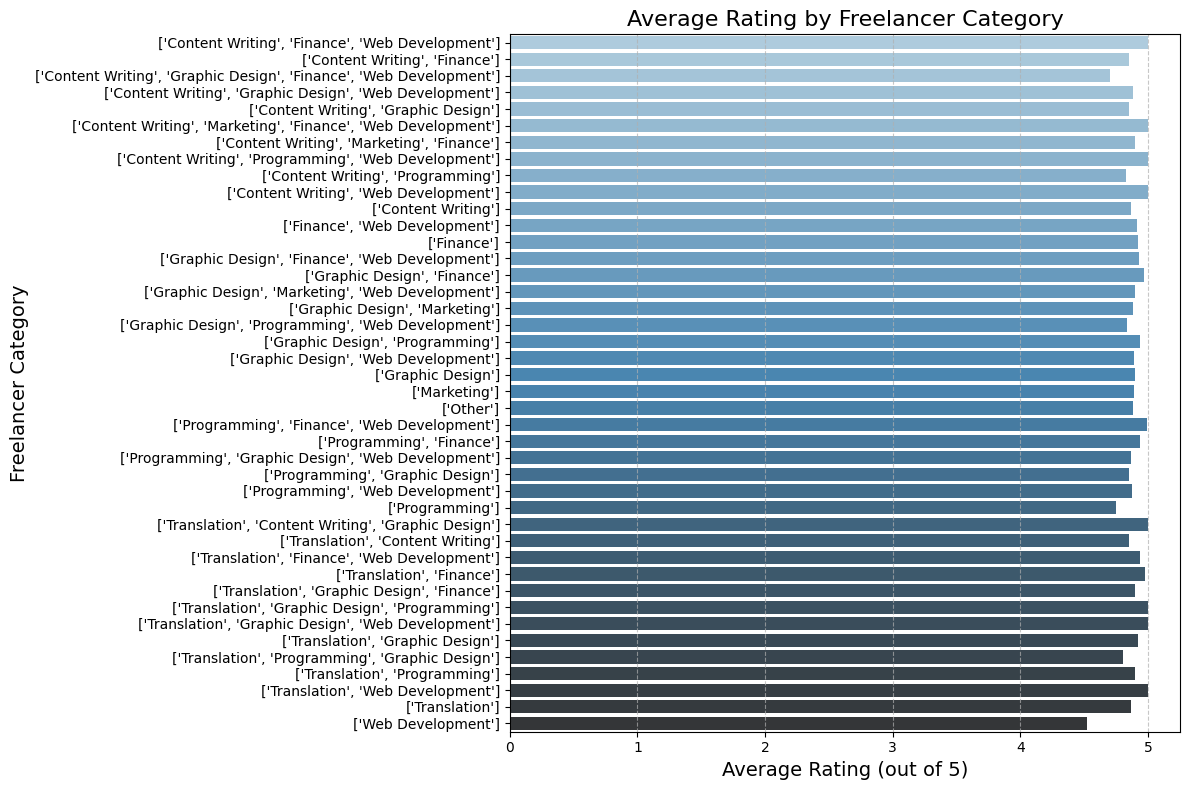

Average Rating by Category:
categories
['Content Writing', 'Finance', 'Web Development']                      5.000000
['Translation', 'Web Development']                                     5.000000
['Translation', 'Content Writing', 'Graphic Design']                   5.000000
['Content Writing', 'Marketing', 'Finance', 'Web Development']         5.000000
['Content Writing', 'Programming', 'Web Development']                  5.000000
['Translation', 'Graphic Design', 'Web Development']                   5.000000
['Content Writing', 'Web Development']                                 5.000000
['Translation', 'Graphic Design', 'Programming']                       5.000000
['Programming', 'Finance', 'Web Development']                          4.990909
['Translation', 'Finance']                                             4.975000
['Graphic Design', 'Finance']                                          4.965000
['Graphic Design', 'Programming']                                      4.935556
[

In [ ]:
data_cleaned = data_with_rating.dropna(subset=['categories', 'rating'])
data_exploded = data_cleaned.explode('categories')
data_exploded['categories'] = data_exploded['categories'].astype('category')
data_exploded['rating'] = pd.to_numeric(data_exploded['rating'], errors='coerce')
data_exploded = data_exploded.dropna(subset=['rating'])
average_rating_by_category = data_exploded.groupby('categories')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_rating_by_category.values, y=average_rating_by_category.index, palette='Blues_d')

plt.title('Average Rating by Freelancer Category', fontsize=16)
plt.xlabel('Average Rating (out of 5)', fontsize=14)
plt.ylabel('Freelancer Category', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Average Rating by Category:")
print(average_rating_by_category)

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\571753320.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_stats_by_category = data_exploded.groupby('categories')['rating'].agg(['min', 'max', 'mean']).sort_values(by='mean', ascending=False)
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\571753320.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y=rating_stats_by_category.index, data=rating_stats_by_category, palette='Blues_d')


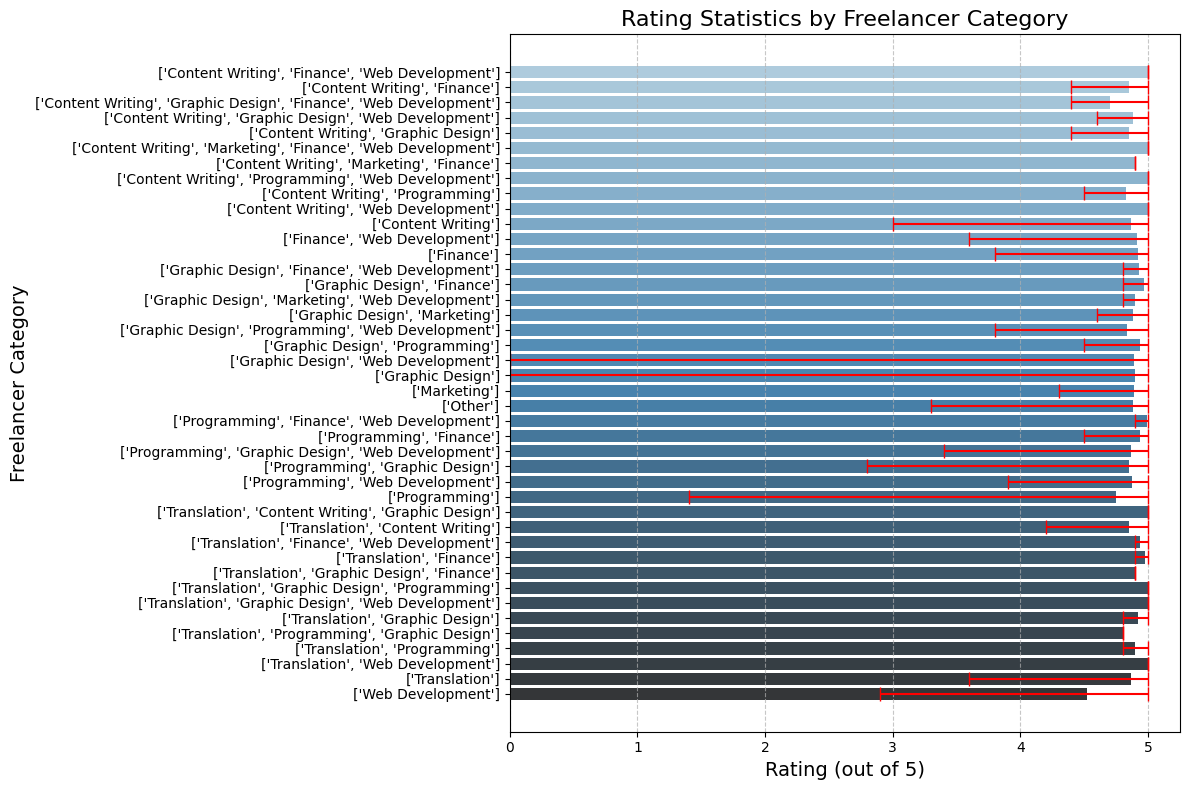

Rating Statistics by Category:
                                                    min  max      mean
categories                                                            
['Content Writing', 'Finance', 'Web Development']   5.0  5.0  5.000000
['Translation', 'Web Development']                  5.0  5.0  5.000000
['Translation', 'Content Writing', 'Graphic Des...  5.0  5.0  5.000000
['Content Writing', 'Marketing', 'Finance', 'We...  5.0  5.0  5.000000
['Content Writing', 'Programming', 'Web Develop...  5.0  5.0  5.000000
['Translation', 'Graphic Design', 'Web Developm...  5.0  5.0  5.000000
['Content Writing', 'Web Development']              5.0  5.0  5.000000
['Translation', 'Graphic Design', 'Programming']    5.0  5.0  5.000000
['Programming', 'Finance', 'Web Development']       4.9  5.0  4.990909
['Translation', 'Finance']                          4.9  5.0  4.975000
['Graphic Design', 'Finance']                       4.8  5.0  4.965000
['Graphic Design', 'Programming']             

In [79]:
data_cleaned = data_with_rating.dropna(subset=['categories', 'rating'])
data_exploded = data_cleaned.explode('categories')
data_exploded['categories'] = data_exploded['categories'].astype('category')
data_exploded['rating'] = pd.to_numeric(data_exploded['rating'], errors='coerce')
data_exploded = data_exploded.dropna(subset=['rating'])


rating_stats_by_category = data_exploded.groupby('categories')['rating'].agg(['min', 'max', 'mean']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=rating_stats_by_category.index, data=rating_stats_by_category, palette='Blues_d')


plt.errorbar(x=rating_stats_by_category['mean'], y=rating_stats_by_category.index, 
             xerr=[rating_stats_by_category['mean'] - rating_stats_by_category['min'], 
                   rating_stats_by_category['max'] - rating_stats_by_category['mean']],
             fmt='none', c='red', capsize=5)

plt.title('Rating Statistics by Freelancer Category', fontsize=16)
plt.xlabel('Rating (out of 5)', fontsize=14)
plt.ylabel('Freelancer Category', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Rating Statistics by Category:")
print(rating_stats_by_category)


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21976\2399792732.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freelancer_counts = data_cleaned.groupby(['Region', 'level']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

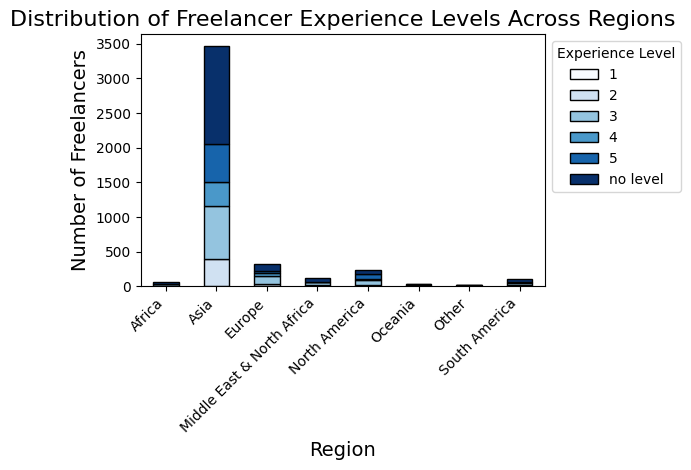

Freelancer Counts by Region and Level:
level                       1    2    3    4    5  no level
Region                                                     
Africa                      0    8   26    3    4        25
Asia                        3  395  769  339  547      1410
Europe                      0   30  117   42   39        96
Middle East & North Africa  0   17   41    4    5        56
North America               0   24   62   23   67        57
Oceania                     0    6   16    2    4        11
Other                       0    8   10    1    0         8
South America               0   24   32    5    7        44


In [81]:

data_cleaned = data_with_rating.dropna(subset=['Region', 'level'])
data_cleaned['level'] = data_cleaned['level'].astype('category')

freelancer_counts = data_cleaned.groupby(['Region', 'level']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
freelancer_counts.plot(kind='bar', stacked=True, colormap='Blues', edgecolor='black')

plt.title('Distribution of Freelancer Experience Levels Across Regions', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Freelancers', fontsize=14)

plt.legend(title='Experience Level', loc='upper left', bbox_to_anchor=(1.0, 1.0))


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


print("Freelancer Counts by Region and Level:")
print(freelancer_counts)